In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
%matplotlib inline

In [2]:
# Load dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data"
boston = pd.read_csv(url, header=None, delim_whitespace=True)

# Set column names
boston.columns = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]

# Print DataFrame
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [3]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [4]:
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [5]:
boston.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [6]:
boston['Price'] = boston.MEDV
boston.drop(columns='MEDV',inplace=True)


In [16]:
data = {}
ls = []
len = 0
for index,row in boston.sample(2).iterrows():
    for col_name, col_value in row.items():
        data[col_name]= col_value
        
    ls.append(data)
ls[0]

{'CRIM': 12.8023,
 'ZN': 0.0,
 'INDUS': 18.1,
 'CHAS': 0.0,
 'NOX': 0.74,
 'RM': 5.854,
 'AGE': 96.6,
 'DIS': 1.8956,
 'RAD': 24.0,
 'TAX': 666.0,
 'PTRATIO': 20.2,
 'B': 240.52,
 'LSTAT': 23.79,
 'Price': 10.8}

### Visualising Correlation between Price and other features




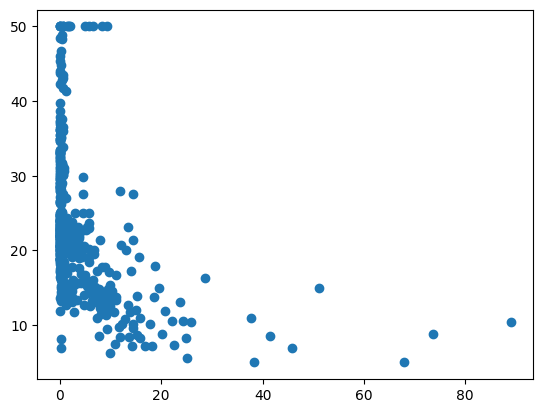

In [17]:

plt.scatter(x=boston.CRIM,y=boston.Price)

<Axes: xlabel='CRIM', ylabel='Price'>

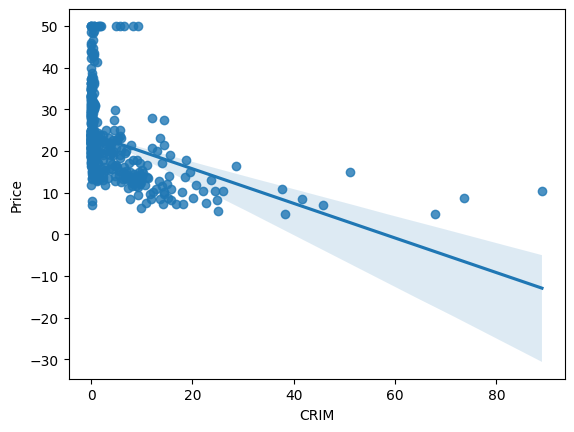

In [18]:
sns.regplot(x=boston.CRIM,y=boston.Price)

## Definin Training and Testing Data

In [7]:
## Independent and Dependent Features
x = boston.iloc[:,:-1]
y = boston.iloc[:,-1]

In [8]:
print(x.shape,y.shape)

(506, 13) (506,)


In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(354, 13) (152, 13) (354,) (152,)


In [10]:
## Normalization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [13]:
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)

In [26]:
pickle.dump( scaler, open('scaler.pkl','wb') )

### Model Training

In [12]:
from sklearn.linear_model import LinearRegression
rgresor = LinearRegression()

In [14]:
rgresor.fit(X_train,y_train)
y_pred = rgresor.predict(X_test)

c:\Users\writl\.conda\envs\cefr\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\writl\.conda\envs\cefr\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [17]:
# print("Coeficients: ",rgresor.coef_)
print(rgresor.intercept_)

23.01581920903955


In [18]:
pickle.dump(rgresor,open('regresor.pkl','wb') )

In [15]:
y_pred[:10]

array([28.64896005, 36.49501384, 15.4111932 , 25.40321303, 18.85527988,
       23.14668944, 17.3921241 , 14.07859899, 23.03692679, 20.59943345])

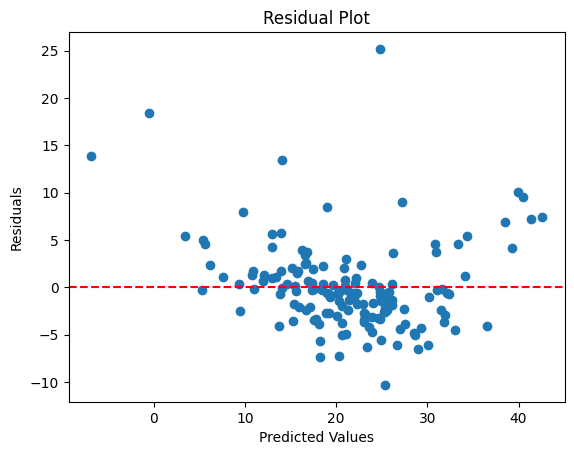

In [19]:
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.axhline(y=0, color='red', linestyle='--')
plt.show()

Text(0.5, 1.0, 'Comparison b/w Testing and Predicted Data')

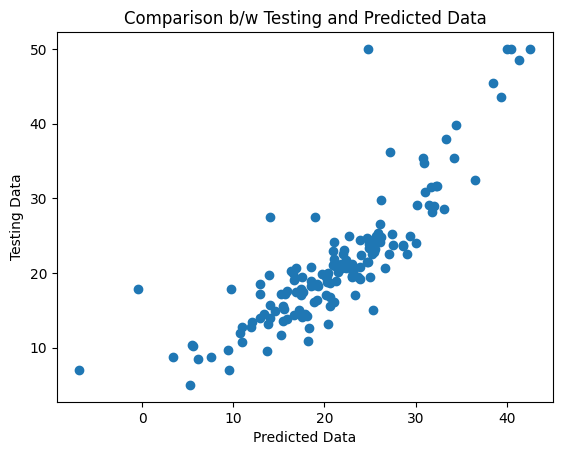

In [20]:
# Plotting scatter plot against predicted and test data
plt.scatter(y_pred, y_test)
plt.xlabel('Predicted Data')
plt.ylabel('Testing Data')
plt.title('Comparison b/w Testing and Predicted Data')

In [21]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

# Assuming y_test contains actual target values and y_pred contains predicted values
mse = mean_squared_error(y_test, y_pred)
print(mse)
print(mean_squared_error(y_test,y_pred,squared=False))


21.51744423117721
4.6386899261728205


c:\Users\writl\.conda\envs\cefr\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\writl\.conda\envs\cefr\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\writl\.conda\envs\cefr\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\writl\.conda\envs\cefr\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype)

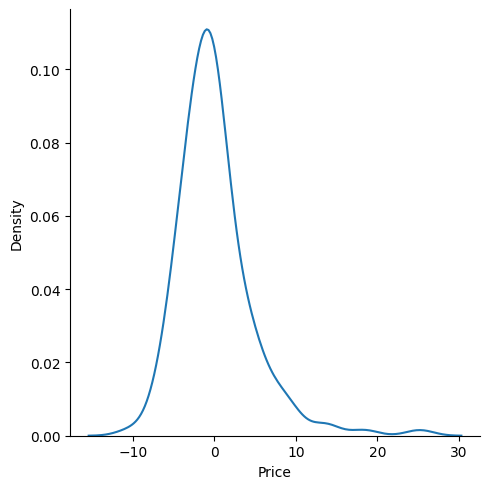

In [22]:
sns.displot(residuals,kind = 'kde')

### R Square and Adjusted R Square
r^2 = 1 - SSR/SST <br>
r^2 = Coefficient of determination <br>
SSR = Sum of squared residuals <BR>
SST : Total Sum of Squares

### Adjusted R Square
r^2 = 1 - (1-r^2)(n-1)/(n-p-1)<br>
n : no of observations or sample size<br>
p : no of predictor variables

In [23]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_pred)
r2

c:\Users\writl\.conda\envs\cefr\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\writl\.conda\envs\cefr\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


0.7112260057484932

In [24]:
# Calculate adjusted R-squared (adjusted R2)
n = y_test.shape[0]  # Number of observations
p = x_train.shape[1]   # Number of predictor variables (features)
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
adj_r2

0.6840226584639308

## New Data Prediction
To Predict new data first transform the data using Standard Scaler     

In [25]:
model = pickle.load(open('regresor.pkl','rb'))

In [89]:
tt,y_val = scaler.transform(np.array( boston.iloc[:1,:-1] )), boston.iloc[1,-1:].Price
print(tt,'----->',y_val)

[[6.320e-03 1.800e+01 2.310e+00 0.000e+00 5.380e-01 6.575e+00 6.520e+01
  4.090e+00 1.000e+00 2.960e+02 1.530e+01 3.969e+02 4.980e+00]] -----> 21.6


In [90]:
rgresor.predict(tt)

array([-45.64344024])

In [76]:
import json
json_data = {
   "data":{
      "RIM":12.8023,
      "ZN":0.0,
      "INDUS":18.1,
      "CHAS":0.0,
      "NOX":0.74,
      "RM":5.854,
      "AGE":96.6,
      "DIS":1.8956,
      "RAD":24.0,
      "TAX":666.0,
      "PTRATIO":20.2,
      "B":240.52,
      "LSTAT":23.79
   }
}

In [91]:
nd = np.array(list(json_data['data'].values())).reshape(1,-1)
nd.shape
nd = scaler.transform(nd)
rgresor.predict(nd)

array([-804.84425017])